# Advertiser DataXu Example:
---
## 1 billion impression records joined to MariaDB:
---

In [51]:
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_categories', 300)
pd.set_option('display.width', 208)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.memory_usage', True)
import pydrill.client
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

In [52]:
db = pydrill.client.PyDrill(host = '192.168.101.12')

In [4]:
db.query('show files from hdfs.`/advertisers/all/dataxu/0DZkTrszzb/fact_impressions/parquet`', timeout = 600).to_dataframe()

,accessTime,group,isDirectory,isFile,length,modificationTime,name,owner,permissions
0,1969-12-31T16:00:00.000-08:00,supergroup,true,false,0,2016-09-28T14:30:49.410-07:00,fact_impressions,hadoop,rwxr-xr-x


In [24]:
%time int(db.query('select count(1) from hdfs.`/advertisers/all/dataxu/0DZkTrszzb/fact_impressions/parquet`', timeout = 600).to_dataframe().iloc[0])

CPU times: user 12.8 ms, sys: 1.09 ms, total: 13.8 ms
Wall time: 669 ms


930370497

In [9]:
db.query('select * from hdfs.`/advertisers/all/dataxu/0DZkTrszzb/fact_impressions/parquet` limit 2', timeout = 600).to_dataframe()

,campaign_uid,cookies,country_code,created_dt,creative_uid,dir0,dx_category_list,event_id,exchange_publisher,exchange_uid,flight_uid,hour,ip_address,metrocode_code,micro_raw_spend,page_url,placement_uid,postal_code,region_code,site_name,source_timestamp,top_category,user_agent_dim_uid,user_id,winning_audience_uid
0,0CjDJFeY8u,wfivefivec=edfb0f76-be96-4c1d-8375-046ee54618af,US,2014-11-30,0RwyFYmADC,fact_impressions,Arts-Entertainment-FineArt;Technology-Computin...,cdn1-xre12.bfi_dataxu_adtrack_event_2014113019...,,g8vz7c1777c5qlsyupmnb,0FGgQLqKi5,14,199.188.84.206,507,672.0000000000000000000000000000000000000000,http://kepguru.hu/hatterkepek/cimke/ejszakai-k...,,29902,SC,kepguru.hu,1417374725000,Hobbies-Interests,RuhnW3j,edfb0f76-be96-4c1d-8375-046ee54618af,
1,0CjDJFeY8u,wfivefivec=3f009ac8-d219-48d9-996e-b83ec447faa4,US,2014-11-30,0REnlPk0m0,fact_impressions,Technology-Computing;Reference-Dictionary-Phon...,cdn1-xre15.bfi_dataxu_adtrack_event_2014113019...,,g8xazmqz4wto8y37y14h4,0FB4Na6nJy,14,69.116.16.98,501,2788.8000000000000000000000000000000000000000,http://www.weather.com/weather/tenday/l/08807:...,,08807,NJ,www.weather.com,1417375365000,News,Ruv4N65,3f009ac8-d219-48d9-996e-b83ec447faa4,


In [53]:
sqltxt = '''
select top_category, count(1) as cnt
from hdfs.`/advertisers/all/dataxu/0DZkTrszzb/fact_impressions/parquet`
group by top_category
order by cnt desc
'''
%time df = db.query(sqltxt, timeout = 600).to_dataframe()
df.cnt = df.cnt.astype(int)
df.head(20).style.background_gradient(cmap = sns.light_palette("green", as_cmap=True))

CPU times: user 11.5 ms, sys: 3.79 ms, total: 15.3 ms
Wall time: 44.1 s


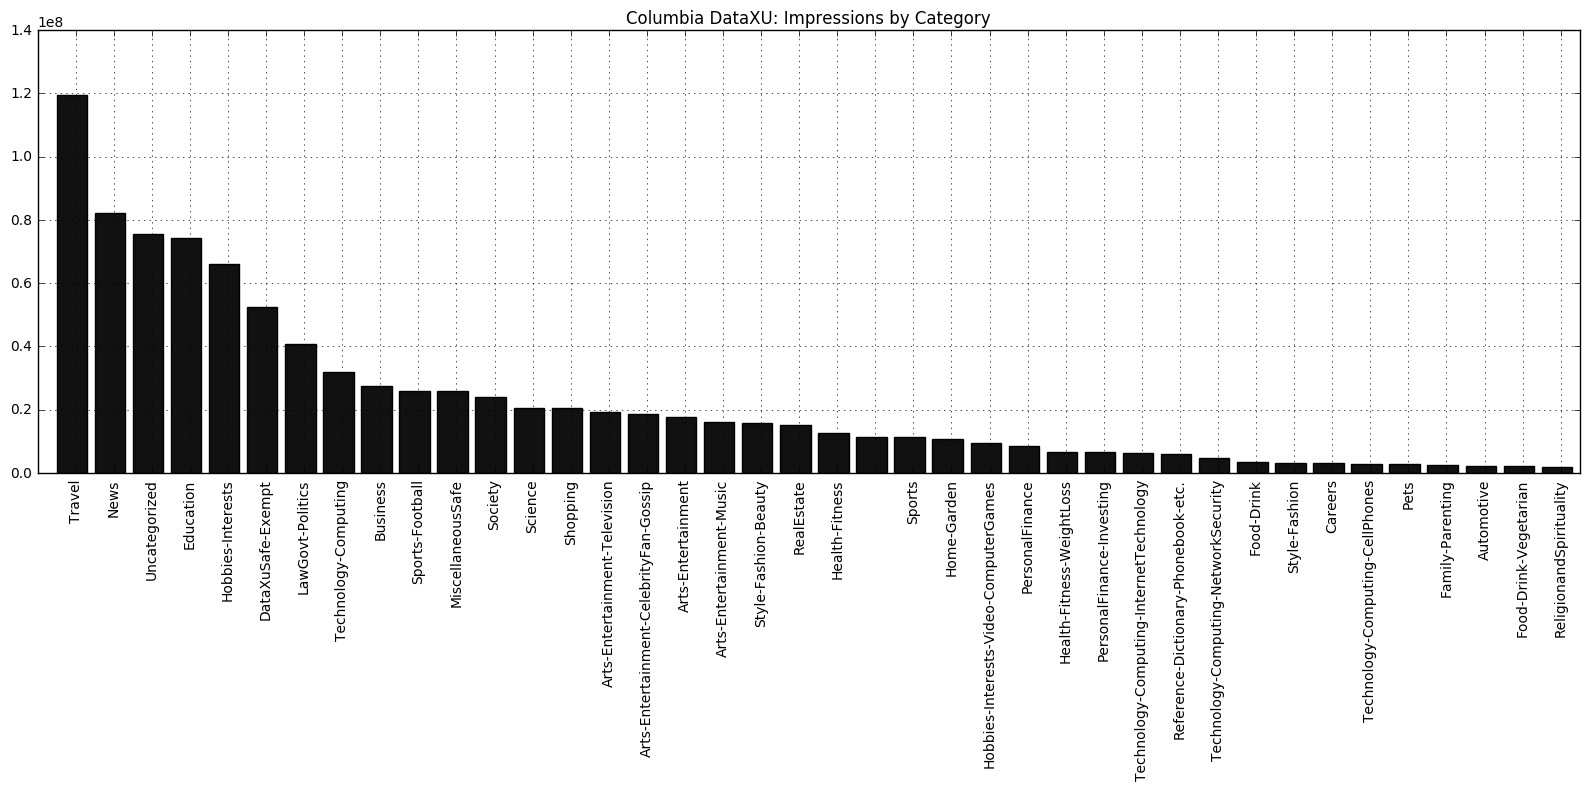

In [46]:
numbars = 40
dfplt = df.head(numbars)
x = np.arange(1, numbars + 1)
fig, ax = plt.subplots(1, 1, figsize = (16,8))
ax.bar(x, dfplt.cnt, color = '#111111')
ax.set_ylim((0, 1.4*10**8))
ax.set_title('Advertiser DataXU: Impressions by Category')
ax.grid()
ax.set(xticklabels = dfplt.top_category, xticks = x + 0.5, xlim = (0.5, len(x)+1))
plt.xticks(rotation = 90)
plt.tight_layout();